<a href="https://colab.research.google.com/github/Alirez1043/DeepLearning/blob/main/Assighments/3/Callback_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download dataset**

In [1]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2022-03-02 11:55:40--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 929 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     929  --.-KB/s    in 0s      

2022-03-02 11:55:40 (26.2 MB/s) - ‘dataset.py’ saved [929/929]

--2022-03-02 11:55:40--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset/Data_hoda_full.mat 

Download Learning Rate Finder source file from github

In [2]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py 

--2022-03-02 11:55:43--  https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘learningratefinder.py’

learningratefinder. 100%[===================>]   5.31K  --.-KB/s    in 0s      

2022-03-02 11:55:43 (42.0 MB/s) - ‘learningratefinder.py’ saved [5439/5439]



# **Import Libararies**

In [3]:
!pip install -q -U tensorflow_addons
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.layers.core import Dropout
from keras.callbacks import TensorBoard
import datetime
import numpy as np
from dataset import load_hoda
from learningratefinder import LearningRateFinder
import matplotlib.pyplot as plt
import os


     |████████████████████████████████| 1.1 MB 13.6 MB/s 


# **Prepare Data**

In [4]:
# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Image_Height = Image_Width = 28
Image_Channels = 1

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1 , Image_Height , Image_Width , Image_Channels )
x_test = x_test.reshape(-1 , Image_Height , Image_Width , Image_Channels )


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

# **Make Model Architecture**

In [5]:
def get_training_model():
    input_ = layers.Input(shape = x_train.shape[1:] ,name = 'input')
    conv1 = Conv2D(32 ,(3,3) ,activation = 'relu')(input_)
    pool1 = MaxPooling2D((2,2))(conv1)
    conv2 = Conv2D(64 ,(3,3) ,activation = 'relu')(pool1)
    pool2 = MaxPooling2D((2,2))(conv2)
    conv3 = Conv2D(64 ,(3,3) ,activation = 'relu')(pool2)
    flatten = layers.Flatten()(conv3)
    D1 = layers.Dense(64 ,activation = 'relu')(flatten)
    D1  = Dropout(0.5)(D1)
    output = keras.layers.Dense(10 ,activation = 'softmax' ,name = 'output')(D1)

    return keras.models.Model(inputs=input_ , outputs=output)

In [29]:
# Compile model
standard_model = get_training_model()
standard_model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-4 ,momentum=0.9),
              metrics=['accuracy'])

Epoch 1/19
110/110 [==============================] - 1s 8ms/step - loss: 2.2918 - accuracy: 0.1337
Epoch 2/19
110/110 [==============================] - 1s 8ms/step - loss: 2.2930 - accuracy: 0.1363
Epoch 3/19
110/110 [==============================] - 1s 8ms/step - loss: 2.2917 - accuracy: 0.1297
Epoch 4/19
110/110 [==============================] - 1s 8ms/step - loss: 2.2936 - accuracy: 0.1343
Epoch 5/19
110/110 [==============================] - 1s 8ms/step - loss: 2.2890 - accuracy: 0.1543
Epoch 6/19
110/110 [==============================] - 1s 7ms/step - loss: 2.2892 - accuracy: 0.1449
Epoch 7/19
110/110 [==============================] - 1s 8ms/step - loss: 2.2907 - accuracy: 0.1389
Epoch 8/19
110/110 [==============================] - 1s 8ms/step - loss: 2.2901 - accuracy: 0.1363
Epoch 9/19
110/110 [==============================] - 1s 8ms/step - loss: 2.2912 - accuracy: 0.1409
Epoch 10/19
110/110 [==============================] - 1s 8ms/step - loss: 2.2864 - accuracy: 0.1480

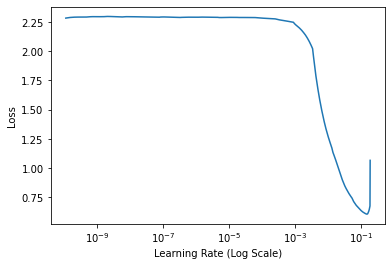

In [30]:
# initialize the learning rate finder and then train with learning
# rates ranging from 1e-10 to 1e+1
lrf = LearningRateFinder(standard_model)
lrf.find((x_train, y_train),1e-10, 1e+1)
# plot the loss for the various learning rates and save the
# resulting plot to disk
lrf.plot_loss()

# **Define hyperparameters**

In [31]:
BATCH_SIZE = 256
EPOCHS = 20
INIT_LR = 1e-3
MAX_LR = 1e-1

# Train a model without Cyclical Learning Rates (CLRs)

In [32]:
def train_model(model, optimizer):
    model.compile(loss="categorical_crossentropy", optimizer=optimizer,
                       metrics=["accuracy"])
    history = model.fit(x_train,
        y_train,
        batch_size=BATCH_SIZE,
        validation_data=(x_val, y_val),
        epochs=EPOCHS)
    return history

In [33]:
standard_model = get_training_model()
no_clr_history = train_model(standard_model, optimizer="sgd")

Epoch 1/20
14/14 [==============================] - 1s 32ms/step - loss: 2.2972 - accuracy: 0.1049 - val_loss: 2.2870 - val_accuracy: 0.1250
Epoch 2/20
14/14 [==============================] - 0s 19ms/step - loss: 2.2795 - accuracy: 0.1234 - val_loss: 2.2686 - val_accuracy: 0.1500
Epoch 3/20
14/14 [==============================] - 0s 17ms/step - loss: 2.2566 - accuracy: 0.1809 - val_loss: 2.2486 - val_accuracy: 0.2500
Epoch 4/20
14/14 [==============================] - 0s 18ms/step - loss: 2.2436 - accuracy: 0.1977 - val_loss: 2.2273 - val_accuracy: 0.2600
Epoch 5/20
14/14 [==============================] - 0s 16ms/step - loss: 2.2130 - accuracy: 0.2460 - val_loss: 2.2004 - val_accuracy: 0.2900
Epoch 6/20
14/14 [==============================] - 0s 17ms/step - loss: 2.1929 - accuracy: 0.2471 - val_loss: 2.1678 - val_accuracy: 0.3700
Epoch 7/20
14/14 [==============================] - 0s 15ms/step - loss: 2.1556 - accuracy: 0.2854 - val_loss: 2.1238 - val_accuracy: 0.4300
Epoch 8/20
14

# **Define CLR schedule**

In [34]:
steps_per_epoch = len(x_train) // BATCH_SIZE
clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    scale_fn=lambda x: 1/(2.**(x-1)),
    step_size=2 * steps_per_epoch
)
optimizer = tf.keras.optimizers.SGD(clr)

Visualize how the clr schedule looks like.

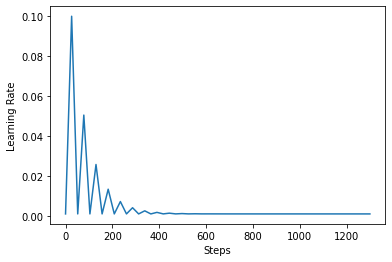

In [36]:
step = np.arange(0, 100 * steps_per_epoch)
lr = clr(step)
plt.plot(step, lr)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.show()


In this assighment ,we use triangular2 methode in the CLR paper 

# **Train a model with CLR**

In [37]:
clr_model = get_training_model()
clr_history = train_model(clr_model, optimizer=optimizer)

Epoch 1/20
14/14 [==============================] - 1s 33ms/step - loss: 2.2998 - accuracy: 0.1143 - val_loss: 2.2776 - val_accuracy: 0.2900
Epoch 2/20
14/14 [==============================] - 0s 17ms/step - loss: 2.2490 - accuracy: 0.2200 - val_loss: 2.1422 - val_accuracy: 0.5800
Epoch 3/20
14/14 [==============================] - 0s 17ms/step - loss: 1.9970 - accuracy: 0.3414 - val_loss: 1.5744 - val_accuracy: 0.7250
Epoch 4/20
14/14 [==============================] - 0s 17ms/step - loss: 1.5549 - accuracy: 0.5143 - val_loss: 1.2832 - val_accuracy: 0.7800
Epoch 5/20
14/14 [==============================] - 0s 17ms/step - loss: 1.4101 - accuracy: 0.5383 - val_loss: 1.2193 - val_accuracy: 0.6850
Epoch 6/20
14/14 [==============================] - 0s 15ms/step - loss: 1.4340 - accuracy: 0.5180 - val_loss: 0.8014 - val_accuracy: 0.8300
Epoch 7/20
14/14 [==============================] - 0s 15ms/step - loss: 1.0099 - accuracy: 0.6560 - val_loss: 0.6093 - val_accuracy: 0.8350
Epoch 8/20
14

# **Visualize losses**

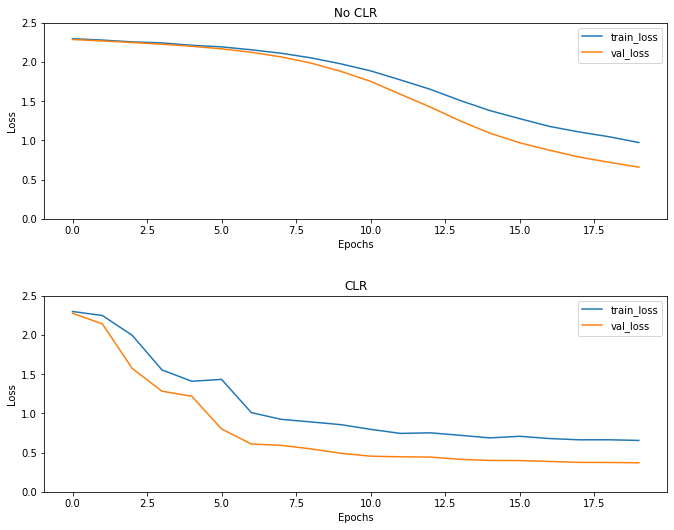

In [38]:
(fig, ax) = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(no_clr_history.history["loss"], label="train_loss")
ax[0].plot(no_clr_history.history["val_loss"], label="val_loss")
ax[0].set_title("No CLR")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_ylim([0, 2.5])
ax[0].legend()

ax[1].plot(clr_history.history["loss"], label="train_loss")
ax[1].plot(clr_history.history["val_loss"], label="val_loss")
ax[1].set_title("CLR")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_ylim([0, 2.5])
ax[1].legend()

fig.tight_layout(pad=3.0)
fig.show()

# Result
Best LearningRate is between 1e-3 < learning rate < 1e-1

With using Cyclical Learning Rates we can optimize our model .